# Support Vector Machine
Notes based on http://www.cs.northwestern.edu/~pardo/courses/eecs349/lectures/eecs349_support_vector_machines.pdf
https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291

In [28]:
#initializing code


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

Assume we have to classify the following data:

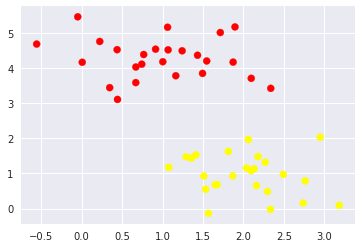

In [29]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Last time, Gabriel mentioned that a line could do the job. Among all the possible lines, which one is better? and does the choice matter?

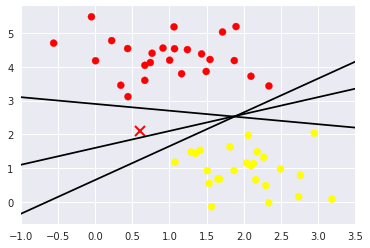

In [30]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Suppose point "x" is a testing point,  we can see how different choices of the line give it a different classification!

To solve this problem we need to learn the trhee main ideas in SVM:

    Find an optimal (hyper)plane to split the data into two sets: 
    maximize margin.
    Extend the above definition for non-linearly problems: 
    have a penalty term for misclassifications.
    Map data to high dimensional space where it is easier to classify with  linear decision surfaces: 
    reformulate the problem so that data is mapped implicity to this space.

### Find an optimal (hyper)plane to split the data into two sets:  maximize margin.

First step: Assume we can find a hyperplane to separe the data.

An hyperplane can be written as the set of points $x$ satisfying 

$$w\cdot x+b=0$$ 

where $w$ and $b$ are vectors in $R^d$. 

   We denote by $D=\{(x_i,y_i)|x_i\in R^d, y_i\in\{-1,1\} \}$.
   
   We define $d^+$ as the distance from the hyperplane to the closest positive example.
   
   We define $d^-$ as the distance from the hyperplane to the closest negative example.
   
   We define the 'margin', m as $m=d^++d^-$

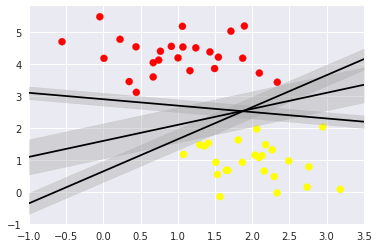

In [31]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);



Let's import the SVM classifier.

In [32]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The following function will help us visualize the model.

In [33]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Support Vectors are points on the margins:

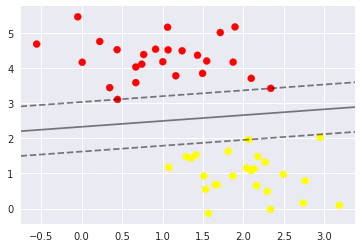

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);



Some math facts:
    
   The function $(x,y)\rightarrow w(x,y)+b=(x^\prime, y^\prime)$ creates new axis, so that all red points ($y = 1$) have $y^\prime>1$  and all yellow ($y = -1$) points have $y^\prime<1$, in other words:
    
   $$y_i(wx_i+b)>1 \forall \{x_i,y_i\} \in D.$$ 
    
   There is a choice of $w$ and $b$ so that 
   $$d^+=d^-=\frac{1}{||w||}.$$
    
We can rephrase the problem as:

   to maximize $$\frac{2}{||w||}$$  such that $y_i(wx_i+b)-1 > 0,$ or

   to minimize $$||w||^2/2$$ such that $y_i(wx_i+b)-1>0.$
  
Using Lagrange multipliers we obtain:

   $$L=1/2||w||^2-\sum^{|D|}\alpha_iy_i(x_i\cdot w+b)+\sum^{|D|}\alpha_i$$
    
Deriving with respect to $w, b$ we obtain that:

   $$w=\sum^S \alpha_{t_i}y_{t_i}x_{t_i}$$

   $$0=\sum \alpha_{t_i}y_{t_i}$$

where the sum is over $S$, the support vectors.

Then $$L=\sum \alpha_{t_i}-1/2\sum\sum \alpha_i\alpha_j y_i y_j  (x_i, x_j),$$ and  we solve the dual problem:

   Primal problem: minimize $1/2||w||^2$, s.t. $y_i(w\cdot x+b)\geq 0 \forall i,$
   
   Dual problem: maximize $q(\alpha)=\sum \alpha_i -\frac{1}{2}\sum\sum \alpha_i\alpha_j y_i y_j  (x_i, x_j)$ s.t. $\alpha_i\geq 0, \sum y_i\alpha_i=0.$

Since the constrains are simpler, the dual problem is easier to solve.
  

### Extend the above definition for non-linearly problems: have a penalty term for misclassifications.
Unrealistic shape expectations.

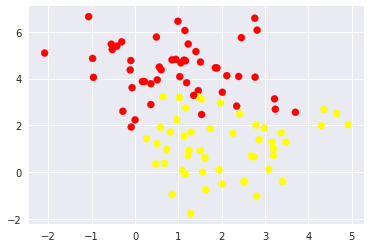

In [35]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

#### Linear Soft-Margin SVM

Allow some instances to fall within the margin but penalize them. Introduce slack variables $\xi_i$, one per data point.

$y_i(w\cdot x_i+b)\geq 1-\xi_i \forall (x_i, y_i)\in D, \xi_i\geq 0.$

We now minimize:
$1/2w\cdot w+C\sum \xi_i,$
with 
$y_i(w\cdot x+b)\geq 1-\xi_i \forall (x_i, y_i)\in D, \xi_i\geq 0$.

$C$ determines the weight to give misclassification error, if $C\rightarrow \infty$ we recover the hard-margin solution.

   Dual problem: maximize $q(\alpha)=\sum \alpha_i -\frac{1}{2}\sum\sum \alpha_i\alpha_j y_i y_j  (x_i, x_j)$ s.t. $C\geq\alpha_i\geq 0, \sum y_i\alpha_i=0.$
   
Only difference is that there is an upper bound $C$ on $\alpha_i$.


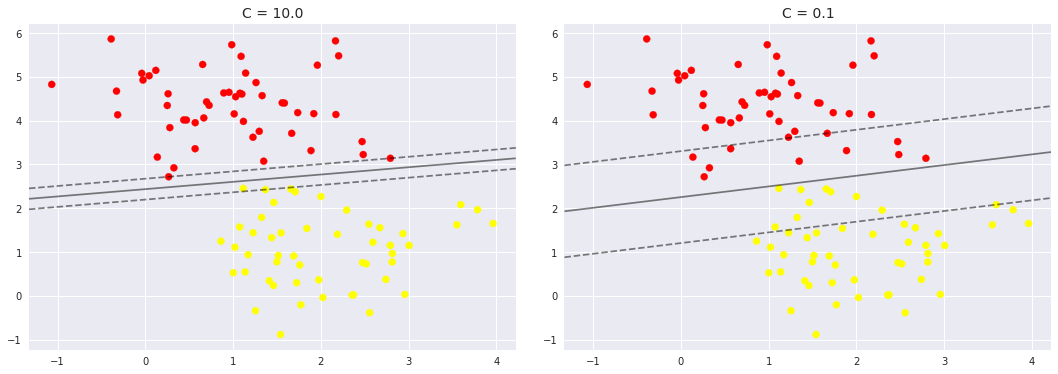

In [36]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)



Comparison:
    
    Soft-Margin always have a solution.
    Soft-Margin is more robust to outliers.
    Hard-Margin requires no parameters at all.

Linear SVM Overview:

   The classifier is a separating (hyper)plane.

   Most important training points are support vectors as they define the hyperplane.
    
   Quadratic optimization algorithms can identify which training points $x_i$ are support vectors with non zero Lagange multipliers.
    
   Both in the dual formulation and in the solution, training points appear only inside inner products:
$L=\sum \alpha_i-1/2\sum\sum \alpha_i\alpha_jy_iy_j(x_i\cdot x_j)$ subject to $C\geq \alpha_i\geq 0, \sum \alpha_i y_i=0.$    

What if the decision boundary is non-linear?

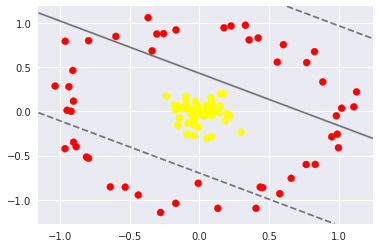

In [37]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### Map data to high dimensional space where it is easier to classify with  linear decision surfaces: reformulate the problem so that data is mapped implicity to this space.

Map points to a higher dimension $x\rightarrow \phi(x)$ where classes can be splitted. It is not clear how many dimensions are needed, and this may be slow.
Fortunately, we dont have to explicit build the vectors.

The optimization problem:


$q(\alpha)=\sum \alpha_i -\frac{1}{2}\sum\sum \alpha_i\alpha_j y_i y_j  (x_i, x_j)$ s.t. $C\geq\alpha_i\geq 0, \sum y_i\alpha_i=0.$
   
becomes

$q(\alpha)=\sum \alpha_i -\frac{1}{2}\sum\sum \alpha_i\alpha_j y_i y_j  (\phi(x_i), \phi(x_j))$ s.t. $C\geq\alpha_i\geq 0, \sum y_i\alpha_i=0.$
   
Kernels are functions $K(x_1, x_2)=<\phi(x_1), \phi(x_2)>$ (you can think that they calculate similarity). 

Kernels can be defined for non vectors, like text documents.   

#### Kernel trick.
As far as we can calculate the inner product, we dont need to calculate $\phi(x)$.


In [38]:
clf = SVC(kernel='rbf', C=1E6)#https://en.wikipedia.org/wiki/Radial_basis_function_kernel
clf.fit(X, y)



SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

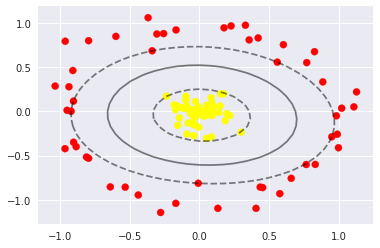

In [39]:
from ipywidgets import interact, fixed
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Examples of Kernels:
    

$K(x_1, x_2)=((x_1)^Tx_2+1)^d$ Polynomial of degree d.

$K(x_1, x_2)= exp(-||x_1-x_2||^2/(2\sigma^2)$ Radial basis function kernel with width $\sigma$.

$K(x_1, x_2)=tanh(k(x_1)^Tx_2+\theta)$ Sigmoid with parameter $k$ and $\theta$.
 
                  
                  

Kernels can be composed, see http://www.cs.northwestern.edu/~pardo/courses/eecs349/lectures/eecs349_support_vector_machines.pdf

Classifying with a kernel:
    
Testing: the new data $z$ is classified as class $1$ if $f\geq0$ and class $-1$ if $f\leq 0$ where:
$w=\sum \alpha_{t_j}y_{t_j}\phi(x_{t_j})$

$f = <w,\phi(z)>+b= \sum \alpha_{t_j}y_{t_j}k(x_{t_j},z)+b$

## Strengths/weakness of SVM
### Strengths
Training is relatively easy: no local max.

It scales relatively well to hight dimensional data.

Tradeoff between classifier complexity and error can be controlled explicitly.

Non traditional data like strings and trees can be used as input to SVM.
### Weakness
Tuning SVM remains a black art: selecting a specific kernel and parameters is usually done in a try and see manner.


What kernel will you use?
How much slack will you allow?